# Курсовая работа по Python для Data Science
### Студент: Мазейко Вадим


2019

##  Введение.

Объктом данной курсовой работы является изучение влияния параметров наблюдений и методов построения модели на точность предсказания целевого параметра. Предметом курсовой работы является изучение взаимосвязи различнх параметров квартир и их взаимодействия с моделями предсказания для получения наиболее точных предсказаний цены

В данной работе мы пренебрегаем разницей между ценой предложения
и ценой сделки. При выполнении работы мы принимаем два неприложных условия: 

1. Не допускается изменять число наблюдений путём добавления и исключения наблюдений

2. Допускается изменять, добавлять и исключать параметры наблюдений 

Данные для анализа предоставлены учебным учреждением и состоят из   тренировочного массива данных train.csv с параметром цены квартиры и целевого массива данных test.csv, для которого требуется подготовить предсказание цены. 

##  Подготовка данных.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train = pd.read_csv('C:/Users/User/GoogleDrive/Learning/geekbrains/1_PyDC01/Kurs_project/train.csv')

In [3]:
data_train.shape

(10000, 20)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


### корреляция данных

Парметры LifeSquare и Healthcare_1 имеют пропущенные значения.
Оцениваем значимость параметров:



In [5]:
data_corr = data_train.corr()
data_corr

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


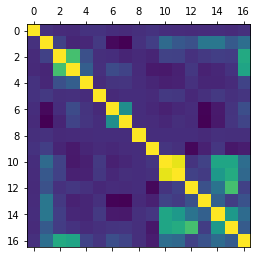

In [17]:
import matplotlib.pyplot as plt
plt.matshow(data_corr)

Обнаруживаем, что данные параметры не являются значимыми для искомого (цены) 

Бегло оценим входящие данные:

In [7]:
data_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### площадь квартир

Из таблицы data_train.describe() видно, что максимальное значение LifeSquare = 7480.592129, а общая Square = 641.065193, что маловероятно
Кроме того, встречаются параметры когда площадь квартиры меньше жилой площади, что не возможно. 

Делаем допущение, что минимальная площадь квартиры 30 м2

In [8]:
data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
178,2416,57,1.0,29.298168,29.770784,5.0,7,5.0,1964,0.133215,B,B,49,11395,3,1406.0,3,4,A,148991.265200
219,5354,85,1.0,28.535084,12.733642,6.0,4,9.0,1967,0.037178,B,B,52,11217,1,2300.0,1,7,B,142269.268090
431,6629,3,1.0,25.761151,15.614058,5.0,4,9.0,1976,0.050900,B,B,43,10621,1,30.0,2,3,B,102046.205346
870,1300,23,1.0,28.827565,28.444315,10.0,8,17.0,2016,0.034656,B,B,0,168,0,NaN,0,0,B,73162.636079
1029,13234,157,1.0,28.145334,17.650399,4.0,4,5.0,1932,0.000000,B,B,30,7538,87,4702.0,5,5,B,201311.771818
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1326,5890,23,1.0,27.981848,27.598712,8.0,13,15.0,2015,0.034656,B,B,0,168,0,NaN,0,0,B,62819.167655
1476,1775,101,1.0,23.583220,18.442768,3.0,3,5.0,1968,0.225825,A,B,41,6558,7,1548.0,3,2,B,108232.647619
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
1675,3538,23,1.0,27.293799,27.730287,10.0,9,17.0,2016,0.034656,B,B,0,168,0,NaN,0,0,B,75695.826241


In [9]:
# приводим данные однокомнатных квартир к среднему по типу: 
data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30) & (data_train['Rooms'] <= 1 ), 'Square'] = data_train.loc[data_train['Rooms'] <= 1, 'Square'].mean()
data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
5617,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,B,B,49,11395,3,1406.0,3,4,A,77835.185808
5667,4352,104,2.0,28.517666,15.565872,3.0,7,6.0,1931,0.000078,B,B,22,6398,141,1046.0,3,23,B,197245.267664


In [10]:
# Допускаем, что данные по комнатам корректны. 
# Приводим данные по трёхкомнатным квартирам к среднему по типу:
data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30) & (data_train['Rooms'] == 3 ), 'Square'] = data_train.loc[data_train['Rooms'] == 3, 'Square'].mean()
data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30)]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
5667,4352,104,2.0,28.517666,15.565872,3.0,7,6.0,1931,0.000078,B,B,22,6398,141,1046.0,3,23,B,197245.267664


In [11]:
# Аналогично приводим данные по двух- и трёхкомнатным квартирам:
data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30) & (data_train['Rooms'] == 3 ), 'Square'] = data_train.loc[data_train['Rooms'] == 3, 'Square'].mean()
data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30) & (data_train['Rooms'] == 2 ), 'Square'] = data_train.loc[data_train['Rooms'] == 2, 'Square'].mean()

data_train.loc[(data_train['Square'] < 30) & (data_train['LifeSquare'] < 30)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [12]:
# проверяем корректность жилой площади:
data_train.loc[data_train['Square'] < data_train['LifeSquare']] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
184,3398,74,1.0,48.743665,51.011232,1.0,12,20.0,2017,0.075779,B,B,6,1437,3,NaN,0,2,B,165071.825722
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
217,5540,27,3.0,57.643613,59.425078,9.0,16,10.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,198351.892455
234,12633,27,3.0,81.867166,81.884548,0.0,12,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,182228.520030
236,3916,1,1.0,43.084413,47.071617,1.0,9,7.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,169749.173815


Жилая площадь не может превышать общую. Допускаем, что общая площадь более корректный параметр. Приводим данные по жилой площади к общей площади:
    

In [13]:
data_train.loc[data_train['Square'] < data_train['LifeSquare'], 'LifeSquare'] = data_train['Square']
data_train.loc[data_train['Square'] < data_train['LifeSquare']] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Рассмотрим ситуации, когда данные жилой площади отсутствуют:

In [14]:
data_train.loc[data_train['LifeSquare'].isnull(), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
27,7550,23,2.0,64.556209,NaN,1.0,8,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,173910.923723
36,11703,23,1.0,41.118766,NaN,1.0,4,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,103510.223601
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
43,175,23,2.0,58.692133,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,184501.011225
46,1821,23,2.0,49.929489,NaN,1.0,9,12.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,88464.425395


In [15]:
# Заполняем пустые значения поля жилой площади значениями общей площади квартиры
data_train['LifeSquare'] = data_train['LifeSquare'].fillna(data_train['Square'])
data_train.loc[data_train['LifeSquare'].isnull(), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Оцениваем корректность данных для квартир метражом меньше 30 кв. м., разделив их на два промежутка:
1. до 25 кв. м. 
2. 25-30 кв.м.

In [21]:
data_train.loc[data_train['Square'] <= 25, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,5.497061,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
3280,10527,27,1.0,4.380726,4.380726,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
6945,12927,62,2.0,17.414181,17.414181,1.0,4,20.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,180750.471749
8030,13265,1,3.0,4.823679,4.823679,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


In [39]:
data_train.loc[data_train['Square'] <= 25, :].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.0000,4.00000,4.0,4.000000,4.000000,4.000000,4.000000,0.0,4.00,4.000000,4.000000
mean,9616.750000,44.500000,2.000000,8.028912,8.028912,0.75,11.0000,19.00000,1986.0,0.104514,13.750000,2803.500000,1.000000,NaN,0.75,2.750000,232134.740539
std,5385.575325,38.284026,0.816497,6.273657,6.273657,0.50,9.0185,2.44949,18.0,0.086563,19.822126,3814.646904,1.414214,NaN,1.50,4.193249,133313.283961
min,1748.000000,1.000000,1.000000,4.380726,4.380726,0.00,4.0000,17.00000,1977.0,0.007122,1.000000,264.000000,0.000000,NaN,0.00,0.000000,97560.720383
25%,8332.250000,20.500000,1.750000,4.712941,4.712941,0.75,5.5000,17.00000,1977.0,0.055899,1.750000,537.750000,0.000000,NaN,0.00,0.750000,159953.033908
50%,11727.000000,44.500000,2.000000,5.160370,5.160370,1.00,8.0000,18.50000,1977.0,0.099767,5.500000,1260.500000,0.500000,NaN,0.00,1.000000,209233.576505
75%,13011.500000,68.500000,2.250000,8.476341,8.476341,1.00,13.5000,20.50000,1986.0,0.148382,17.500000,3526.250000,1.500000,NaN,0.75,3.000000,281415.283137
max,13265.000000,88.000000,3.000000,17.414181,17.414181,1.00,24.0000,22.00000,2013.0,0.211401,43.000000,8429.000000,3.000000,NaN,3.00,9.000000,412511.088764


In [40]:
data_train.loc[data_train['Square'].between(25, 30), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
257,1334,23,1.0,29.401008,29.401008,1.0,4,17.0,2019,0.034656,B,B,0,168,0,NaN,0,0,B,71690.969474
381,5612,23,1.0,29.567101,29.567101,1.0,6,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,74012.218991
501,15923,27,1.0,26.553188,26.553188,0.0,25,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,114256.236153
769,5234,30,1.0,29.947691,29.947691,1.0,11,22.0,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,99110.577389
900,8940,34,1.0,26.811587,26.811587,0.0,18,0.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,175399.643453
1184,3902,23,1.0,27.442238,27.442238,1.0,4,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,65547.071846
2088,11698,23,1.0,29.357435,29.357435,1.0,12,17.0,2018,0.034656,B,B,0,168,0,NaN,0,0,B,66969.101124
2763,9947,23,1.0,29.879036,29.879036,1.0,12,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,67898.291266
2787,1236,30,1.0,27.264869,27.264869,1.0,6,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,80575.634165
3023,4386,27,1.0,29.563428,29.563428,1.0,12,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,78119.884212


In [22]:
data_train.loc[data_train['Square'].between(25, 30), :].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,4.0,22.000000,22.000000,22.000000
mean,8788.727273,25.818182,1.0,28.596063,28.596063,1.000000,9.818182,11.727273,1989.590909,0.067878,13.636364,3534.909091,20.318182,828.5,0.772727,5.045455,93670.363747
std,4798.317485,3.825184,0.0,1.155893,1.155893,1.195229,6.572934,8.367635,18.889803,0.072240,18.879431,4793.813512,49.150291,435.0,1.411916,8.220053,41018.857146
min,1236.000000,20.000000,1.0,26.553188,26.553188,0.000000,1.000000,0.000000,1977.000000,0.000078,0.000000,168.000000,0.000000,176.0,0.000000,0.000000,60502.583500
25%,5003.750000,23.000000,1.0,27.358891,27.358891,1.000000,5.250000,4.000000,1977.000000,0.034656,0.000000,168.000000,0.000000,828.5,0.000000,0.000000,68232.686229
50%,9443.500000,24.000000,1.0,28.994605,28.994605,1.000000,9.000000,12.000000,1977.000000,0.034656,5.500000,1260.500000,0.000000,1046.0,0.000000,0.500000,74592.380424
75%,12347.500000,27.000000,1.0,29.566183,29.566183,1.000000,12.000000,18.500000,2014.750000,0.069753,22.000000,6398.000000,4.000000,1046.0,1.000000,9.500000,98549.262917
max,16077.000000,34.000000,1.0,29.947691,29.947691,6.000000,25.000000,25.000000,2019.000000,0.211401,53.000000,13670.000000,141.000000,1046.0,5.000000,23.000000,199248.114376


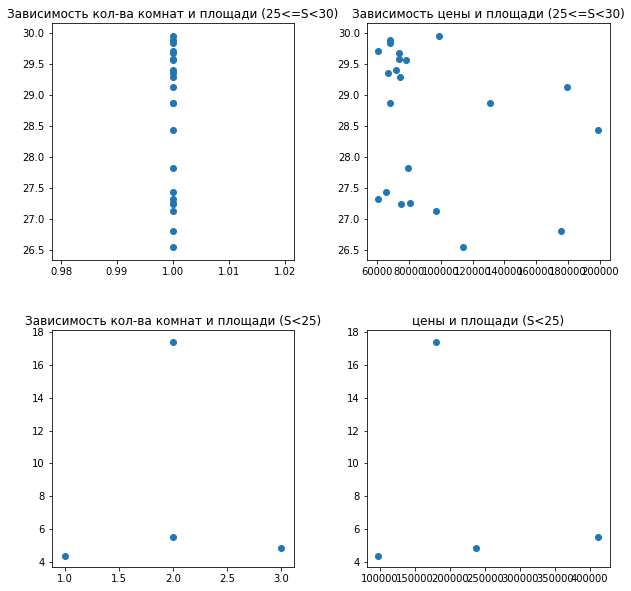

In [38]:
spam = data_train.loc[data_train['Square'].between(25, 30), :]
agg = data_train.loc[data_train['Square'] < 25, :]

fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.scatter(spam['Rooms'], spam['Square'])
ax1.set_title( 'Зависимость кол-ва комнат и площади (25<=S<30)')

ax2.scatter(spam['Price'], spam['Square'])
ax2.set_title( 'Зависимость цены и площади (25<=S<30)')

ax3.scatter(agg['Rooms'], agg['Square'])
ax3.set_title( 'Зависимость кол-ва комнат и площади (S<25)')

ax4.scatter(agg['Price'], agg['Square'])
ax4.set_title( 'цены и площади (S<25)')

fig.set_size_inches(10, 10)
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

Учитывая, что общее число таких наблюдений составляет 26 ед., что менее 0,26% от общего числа наблюдений, а также наличие ценовых аномалий приведём их к стандартному значению цены и площади исходя из количества комнат: 

In [46]:
for i in range(0,4):
    data_train.loc[(data_train['Square'] < 30) & (data_train['Rooms'] == i ), 'Square'] = data_train.loc[data_train['Rooms'] == i, 'Square'].mean()

In [47]:
data_train.loc[data_train['Square'] <= 30, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


## Обучение модели

In [ ]:
С учетом поставленного целевого показателя R2 >= 0,6, построим модель.

Для этого разобьём данные на тестовые и тренировочные выборки:

In [65]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(data_train, test_size=0.3, random_state=42)

# Список параметров, участвующих в построении модели. 
fts = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Shops_1']

Примечание: из списка параметра изъяты все нечисловые параметры. 

In [85]:
from sklearn.ensemble import RandomForestRegressor as RF

Выбрал рандомфорест без предворительного анализа моделей.

In [91]:
max_r2_valid = 0
max_depth_best = None
for i in range(1, 25):
    print('max_depth = {}'.format(i))
    rf = RF(n_estimators=10, max_depth=i, min_samples_leaf=2, random_state=42)
    rf.fit(train.loc[:, fts], train['Price'])
    pred = rf.predict(train.loc[:, fts])
    print(r2(train['Price'], pred))
    pred_valid = rf.predict(valid.loc[:, fts])
    r2_valid = r2(valid['Price'], pred_valid)
    print(r2_valid)
    print()
    if r2_valid > max_r2_valid:
        max_r2_valid = r2_valid
        max_depth_best = i
        
print('max_depth_best: {}, max_r2_valid: {}'.format(max_depth_best, max_r2_valid))

max_depth = 1
0.2872370186071179
0.26013980363588196

max_depth = 2
0.46870824783365406
0.444145744876151

max_depth = 3
0.5453519537751674
0.5086101783752357

max_depth = 4
0.600810051566143
0.5595218113426468

max_depth = 5
0.6573880966305146
0.60638710012838

max_depth = 6
0.7067380685438112
0.639024888919901

max_depth = 7
0.7497594157844023
0.6548284301810392

max_depth = 8
0.7826696697856557
0.6656077681889678

max_depth = 9
0.8138511080502673
0.6725781098793732

max_depth = 10
0.8422244804195943
0.6773897674168632

max_depth = 11
0.8634829887660209
0.6824251769409109

max_depth = 12
0.880767038666099
0.6812744837510216

max_depth = 13
0.8951505758737837
0.6815091976218492

max_depth = 14
0.9052116888525639
0.6825443732493113

max_depth = 15
0.9120623594735664
0.6847057044998345

max_depth = 16
0.9159206455344475
0.681771034028629

max_depth = 17
0.9202028375562971
0.6802942036623056

max_depth = 18
0.9223550376934312
0.6813497635611844

max_depth = 19
0.9223845907709799
0.682167

In [93]:
model = RF(n_estimators=20, max_depth=15, min_samples_leaf=2, random_state=42)
model.fit(train.loc[:, fts], train['Price'])
print('R2:\nTrain: {}, Тest: {}'.format(r2(train['Price'], pred), r2(valid['Price'], pred_valid)))

R2:
Train: 0.9249042721659445, Тest: 0.6808963714008228


Загружаем тестовые данные:

In [94]:
data_test = pd.read_csv('C:/Users/User/GoogleDrive/Learning/geekbrains/1_PyDC01/Kurs_project/test.csv')

Проводим обработку данных аналогично тренировочным данным:

In [100]:
data_test.loc[(data_test['Square'] < 30) & (data_test['LifeSquare'] < 30) & (data_test['Rooms'] <= 1 ), 'Square'] = data_test.loc[data_test['Rooms'] <= 1, 'Square'].mean()
data_test.loc[(data_test['Square'] < 30) & (data_test['LifeSquare'] < 30) & (data_test['Rooms'] == 3 ), 'Square'] = data_test.loc[data_test['Rooms'] == 3, 'Square'].mean()
data_test.loc[(data_test['Square'] < 30) & (data_test['LifeSquare'] < 30) & (data_test['Rooms'] == 2 ), 'Square'] = data_test.loc[data_test['Rooms'] == 2, 'Square'].mean()
for i in range(0,4):
    data_test.loc[(data_test['Square'] < 30) & (data_test['Rooms'] == i ), 'Square'] = data_test.loc[data_test['Rooms'] == i, 'Square'].mean()
data_test.loc[data_test['Square'] < data_test['LifeSquare'], 'LifeSquare'] = data_test['Square']
data_test['LifeSquare'] = data_test['LifeSquare'].fillna(data_test['Square'])
for i in range(0,4):
    data_test.loc[(data_test['Square'] < 30) & (data_test['Rooms'] == i ), 'Square'] = data_test.loc[data_test['Rooms'] == i, 'Square'].mean()    

In [102]:
pred_test = model.predict(data_test.loc[:, fts])

In [ ]:
data_test['Price'] = pred_test

In [104]:
# Сохраняем полученные предсказания
data_test.loc[:, ['Id', 'Price']].to_csv('VMAzeyko_predictions.csv', index=None)